In [65]:
import numpy as np
import pygame
from PIL import Image, ImageFilter
# from G import WIDTH, HEIGHT

def generate_cloud_texture(width, height, scale=10, blur_radius=2):
    low_res_width = width // scale
    low_res_height = height // scale
    noise = np.random.rand(low_res_height, low_res_width) * 255

    noise_image = Image.fromarray(noise.astype(np.uint8), mode='L')
    noise_image = noise_image.resize((width, height), Image.BILINEAR)
    return np.asarray(noise_image.convert('RGB'), dtype=np.float32) / 255

def generate_green_base(width = 600, height = 1000, scale = 2, blur_radius = 20, brightness = 0.7):
    msk = generate_cloud_texture(width, height, scale, blur_radius)
    green = np.zeros(msk.shape)
    green[:,:,0] = 0
    green[:,:,1] = brightness
    green[:,:,2] = brightness/2
    bk = green * msk
    return bk

def to_image(bk):
    return Image.fromarray((255 * bk).astype(np.uint8), mode='RGB')

pygame 2.6.1 (SDL 2.28.4, Python 3.12.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


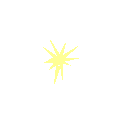

In [112]:
from PIL import Image, ImageDraw
import random
import math

# Function to generate a star-like shape (flash)
def generate_flash_star(image_size, center, num_points, min_radius, max_radius, angle_var=0.01,
                        colour='yellow', r = 0):
    img = Image.new('RGBA', (image_size, image_size), (0, 0, 0, 0))  # Transparent background
    draw = ImageDraw.Draw(img)

    angle_step = 360 / num_points
    def get_points():
        points = []

        for i in range(num_points):
            # Calculate the angle for this point
            angle_deg = i * angle_step
            angle_rad = math.radians(angle_deg) + random.uniform(-angle_var, angle_var)

            # Alternate between randomizing the radius for inner and outer points
            if i % 2 == 0:
                radius = random.uniform(min_radius, max_radius)
            else:
                radius = random.uniform(min_radius // 2, min_radius)  # inner radius variation

            # Calculate the x, y coordinates of the point
            x = center[0] + radius * math.cos(angle_rad)
            y = center[1] + radius * math.sin(angle_rad)
            points.append((x, y))
        return points

    # Draw the star shape
    draw.polygon(get_points(), fill=colour, outline=colour)
    if r > 0:
        draw.ellipse((center[0]-r, center[1]-r, center[0]+r, center[1]+r), fill=(0,0,0,255))
    return img

# Parameters
image_size = 120  # Image size (400x400)
center = (image_size//2, image_size//2)  # Center of the star
num_points = 20  # Number of points in the star
min_radius = 8  # Minimum distance from center
max_radius = 25  # Maximum distance from center
circle_radius = 0

# Generate and save the star image
colour = (255, 255, 150)
flash_star = generate_flash_star(image_size, center, num_points, min_radius, max_radius, 0.2,
                                 colour = colour, r = circle_radius)

display(flash_star)

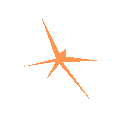

In [125]:
# Parameters
image_size = 120  # Image size (400x400)
center = (image_size//2, image_size//2)  # Center of the star
num_points = 12  # Number of points in the star
min_radius = 7  # Minimum distance from center
max_radius = 50  # Maximum distance from center
circle_radius = 0

# Generate and save the star image
colour = (255, 120, 30, 200)
inner_star = generate_flash_star(image_size, center, num_points, min_radius, max_radius, 0.2,
                                 colour = colour, r = circle_radius)

display(inner_star)

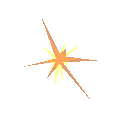

In [126]:
flash_star.paste(inner_star, (0,0), inner_star)
display(flash_star)

In [127]:
flash_star.save("/home/tao.zhang/git_personal/mnb_halo/assets/decals/explosion/ex2.png")  # Save as PNG